Epoch 500/1000, Train Loss: 0.0001, Test Loss: 0.0563, Accuracy: 0.6930
Epoch 1000/1000, Train Loss: 0.0000, Test Loss: 0.0537, Accuracy: 0.7040

Testing Architecture 1:
Epoch 500/1000, Train Loss: 0.0501, Test Loss: 0.0579, Accuracy: 0.6020
Epoch 1000/1000, Train Loss: 0.0265, Test Loss: 0.0421, Accuracy: 0.7020
Final Accuracy for Architecture 1: 70.19999999999999%

Testing Architecture 2:
Epoch 500/1000, Train Loss: 0.0423, Test Loss: 0.0509, Accuracy: 0.6340
Epoch 1000/1000, Train Loss: 0.0212, Test Loss: 0.0407, Accuracy: 0.7150
Final Accuracy for Architecture 2: 71.5%

Testing Architecture 3:
Epoch 500/1000, Train Loss: 0.0321, Test Loss: 0.0451, Accuracy: 0.7080
Epoch 1000/1000, Train Loss: 0.0125, Test Loss: 0.0366, Accuracy: 0.7540
Final Accuracy for Architecture 3: 75.4%


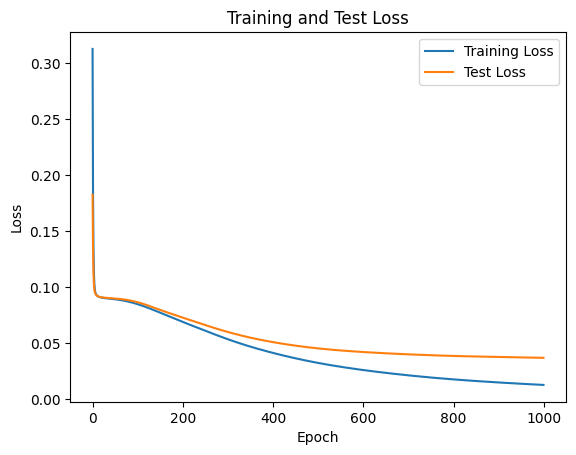

Final Accuracy: 75.4


In [6]:
# Mennatullah Sayed Abo-Elhgag ,20200558, section S4
# Reham Hatem Mohamed          ,20201080, section s4
#Mahmoud Ayman Abdelhamid      ,20200494,  section s4

import numpy as np
import matplotlib.pyplot as plt
from mlxtend.data import mnist_data

# Load the MNIST dataset
X, y = mnist_data()

# Shuffle the data
np.random.seed(42)
indices = np.random.permutation(len(X))
X = X[indices]
y = y[indices]

# Standardize your dataset
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_std[X_std == 0] = 1e-8
X = (X - X_mean) / X_std

# Divide data into training and test sets
train_ratio = 0.8  # 80% for training, 20% for testing
split_index = int(len(X) * train_ratio)
X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]

# Apply one-hot encoding to the labels
num_classes = 10  # Number of classes in MNIST dataset
y_train_onehot = np.zeros((len(y_train), num_classes))
y_test_onehot = np.zeros((len(y_test), num_classes))
for i in range(len(y_train)):
    y_train_onehot[i, y_train[i]] = 1
for i in range(len(y_test)):
    y_test_onehot[i, y_test[i]] = 1


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


def calculate_accuracy(X, y, weights, biases):
    outputs = forward_pass(X, weights, biases)
    predicted_labels = np.argmax(outputs[-1], axis=1)
    true_labels = np.argmax(y, axis=1)
    accuracy = np.mean(predicted_labels == true_labels)
    return accuracy

#------------------------------------------------------------------------------------------------------------


def initialize_parameters(input_size, hidden_layer_sizes, output_size):
    # Combine input size, hidden layer sizes, and output size into a list
    sizes = [input_size] + hidden_layer_sizes + [output_size]
    weights = []  # Initialize an empty list to store the weights
    biases = []  # Initialize an empty list to store the biases
    for i in range(len(sizes) - 1):  # Iterate over the sizes list, excluding the last element(output layer)
        # Initialize random weights for the current layer
        w = np.random.randn(sizes[i], sizes[i + 1])  # w [inputs from the previous layer * the corresponding weights.]
        b = np.zeros((1, sizes[i + 1]))  # Initialize biases as zeros for the current layer
        weights.append(w)  # Add the weights to the weights list
        biases.append(b)  # Add the biases to the biases list
    return weights, biases  # Return the weights and biases lists


def forward_pass(X, weights, biases):
    # Store the input data as the first element of the outputs list
    outputs = [X]
    # Iterate over the weights list, representing each layer in the network
    for i in range(len(weights)):
        # Retrieve the outputs from the previous layer as the inputs to the current layer
        inputs = outputs[-1]
        # Compute the weighted sum of inputs and biases for the current layer
        z = np.dot(inputs, weights[i]) + biases[i]
        # Apply the sigmoid activation function to the weighted sum
        a = sigmoid(z)
        # Add the activations to the outputs list
        outputs.append(a)
    return outputs  # Return the list of outputs for each layer


def backward_pass(X, y, weights, biases, outputs, learning_rate):
    gradients = []  # Initialize an empty list to store the gradients of the weights.
    num_samples = X.shape[0]  # Get the number of samples in the input data.
    d_output = (outputs[-1] - y) / num_samples  # Calculate the gradient of the output layer activations.

    # Compute the gradient of the weights connecting the last hidden layer to the output layer.
    gradients.append(np.dot(outputs[-2].T, d_output))

    biases_gradients = [np.mean(d_output, axis=0)]  # Compute the gradient of the biases for the output layer.

    for i in range(len(weights) - 1, 0, -1):
        # Calculate the gradient of the hidden layer activations.
        d_hidden = np.dot(d_output, weights[i].T) * outputs[i] * (1 - outputs[i])

        # Compute the gradient of the weights connecting the previous layer to the current layer.
        gradients.append(np.dot(outputs[i - 1].T, d_hidden))
        # Compute the gradient of the biases for the current hidden layer.
        biases_gradients.append(np.mean(d_hidden, axis=0))

        d_output = d_hidden  # Update the gradient of the output layer activations.

    gradients.reverse()  # Reverse the order of the gradients list.
    biases_gradients.reverse()  # Reverse the order of the biases_gradients list.

    for i in range(len(weights)):
        weights[i] -= learning_rate * gradients[i]  # Update the weights of each layer.
        biases[i] -= learning_rate * biases_gradients[i]  # Update the biases of each layer.

    return weights, biases  # Return the updated weights and biases.


def train(X_train, y_train, X_test, y_test, num_of_layers, size_of_layers, learning_rate, num_epochs):
    # Get the input and output sizes
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]

    # Initialize weights and biases
    weights, biases = initialize_parameters(input_size, size_of_layers, output_size)

    # Initialize lists to store losses and accuracies
    train_losses = []
    test_losses = []
    accuracies = []

    # Loop through each epoch
    for epoch in range(num_epochs):
        # Forward pass on the training data
        train_outputs = forward_pass(X_train, weights, biases)

        # Calculate the training loss
        train_loss = mse_loss(y_train, train_outputs[-1])

        # Perform backward pass to update weights and biases
        weights, biases = backward_pass(X_train, y_train, weights, biases, train_outputs, learning_rate)

        # Store the training loss
        train_losses.append(train_loss)

        # Forward pass on the test data
        test_outputs = forward_pass(X_test, weights, biases)

        # Calculate the test loss
        test_loss = mse_loss(y_test, test_outputs[-1])

        # Store the test loss
        test_losses.append(test_loss)

        # Calculate accuracy on the test data
        accuracy = calculate_accuracy(X_test, y_test, weights, biases)

        # Store the accuracy
        accuracies.append(accuracy)

        # Print the progress every 500 epochs
        if (epoch + 1) % 500 == 0:
            print(
                f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.4f}")

    # Return the final weights, biases, losses, and accuracies
    return weights, biases, train_losses, test_losses, accuracies

#-------------------------------------------------------------------------------------------------------------------

# Neural Network function
def NN(X_train, y_train, X_test, y_test, num_of_layers, size_of_layers):
    # Set the learning rate
    learning_rate = 0.6

    # Set the number of epochs
    num_epochs = 1000

    # Call the train function to train the neural network
    weights, biases, train_losses, test_losses, accuracies = train(X_train, y_train, X_test, y_test, num_of_layers,
                                                                   size_of_layers, learning_rate, num_epochs)

    # Return the weights, biases, losses, and accuracies
    return weights, biases, train_losses, test_losses, accuracies


# Example usage
num_of_layers = 2
size_of_layers = [500,
                  500]  # is a list that determines the number of neurons in each hidden layer of the neural network
weights, biases, train_losses, test_losses, accuracies = NN(X_train, y_train_onehot, X_test, y_test_onehot,
                                                            num_of_layers, size_of_layers)


# Test with different architectures
architectures = [
    (2, [100, 10]),    # Architecture 1: 2 layers => 1 hidden layer (100 neurons) and 1 output layer (10 neurons)
    (3, [50, 100, 10]),  # Architecture 2: 3 layers => 2 hidden layers (100 and 50 neurons) and 1 output layer (10 neurons)
    (3, [100, 50, 10])  # Architecture 3: 3 layers => 2 hidden layers (50 and 100 neurons) and 1 output layer (10 neurons)
]

for i, (num_of_layers, size_of_layers) in enumerate(architectures):
    print(f"\nTesting Architecture {i+1}:")
    weights, biases, train_losses, test_losses, accuracies = NN(X_train, y_train_onehot, X_test, y_test_onehot,
                                                                num_of_layers, size_of_layers)
    final_accuracy = accuracies[-1]
    print(f"Final Accuracy for Architecture {i+1}: {final_accuracy * 100}%")

#-------------------------------------------------------------------------------------------------------------------

# Plot the training and test losses
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()


final_accuracy = accuracies[-1]
print("Final Accuracy:", final_accuracy * 100)
